<a href="https://colab.research.google.com/github/klysman08/Keggle/blob/master/Previs%C3%A3o_de_invent%C3%A1rio_Feature_Selection_MLClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Módulos utilizados
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier

##Carregando os dados

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# Leitura dos arquivos, preenchendo valores faltantes com -1
train = pd.read_csv('drive/My Drive/Machine Learning/Previsão de inventário/train.csv', index_col='sku').fillna(-1)
test = pd.read_csv('drive/My Drive/Machine Learning/Previsão de inventário/test.csv', index_col='sku').fillna(-1)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


###Separando os dados em teste e treino

In [0]:
# Separação de atributos de entrada (X) e saída (y)
from sklearn.model_selection import train_test_split
X_train, y_train = train.drop('isBackorder', axis=1), train['isBackorder']

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, train_size=0.75, test_size=0.25, random_state=42)

In [0]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(1013216, 21) (1013216,) (337739, 21) (337739,)


In [0]:
X_train.columns

Index(['national_inv', 'lead_time', 'in_transit_qty', 'forecast_3_month',
       'forecast_6_month', 'forecast_9_month', 'sales_1_month',
       'sales_3_month', 'sales_6_month', 'sales_9_month', 'min_bank',
       'potential_issue', 'pieces_past_due', 'perf_6_month_avg',
       'perf_12_month_avg', 'local_bo_qty', 'deck_risk', 'oe_constraint',
       'ppap_risk', 'stop_auto_buy', 'rev_stop'],
      dtype='object')

##Feture Selection

In [0]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import matthews_corrcoef
clf = XGBClassifier()
clf.fit(X_train[X_train.columns], y_train)
print (classification_report(y_test, clf.predict(X_test[X_train.columns])))
print(matthews_corrcoef(y_test, clf.predict(X_test[X_train.columns])))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00    335332
           1       0.50      0.02      0.03      2407

    accuracy                           0.99    337739
   macro avg       0.75      0.51      0.51    337739
weighted avg       0.99      0.99      0.99    337739

0.08673885888437338


###Correlação de Pearson 

O coeficiente de correlação possui valores entre -1 e 1
- um valor mais próximo de 0 implica correlação mais fraca (0 exato não implica correlação)
- um valor mais próximo de 1 implica correlação positiva mais forte
- um valor mais próximo de -1 implica correlação negativa mais forte

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

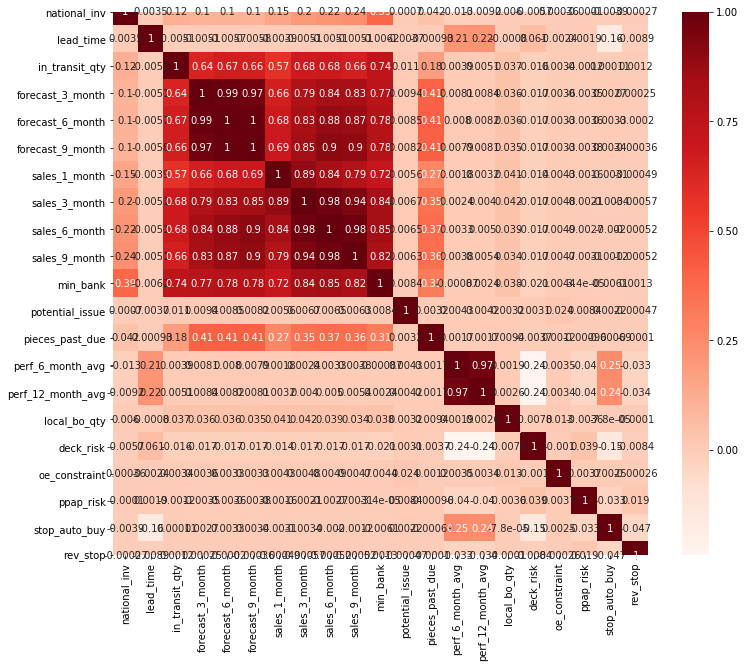

In [0]:
plt.figure(figsize=(12,10))
cor = X_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [0]:
reg = LassoCV()
reg.fit(X_train, y_train)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X_train, y_train))
coef = pd.Series(reg.coef_, index = X_train.columns)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.797396950588336, tolerance: 0.48989451454306776
  tol, rng, random, positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.8766011053075999, tolerance: 0.48989451454306776
  tol, rng, random, positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. 

Best alpha using built-in LassoCV: 0.003265
Best score using built-in LassoCV: 0.000515


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10.562118868089783, tolerance: 0.7326246012700272
  positive)


In [0]:
print("Laço escolhido " + str(sum(coef != 0)) + " variáveis e eliminou a outra " +  str(sum(coef == 0)) + " variáveis")

Laço escolhido 15 variáveis e eliminou a outra 6 variáveis


Text(0.5, 1.0, 'Feature importance using Lasso Model')

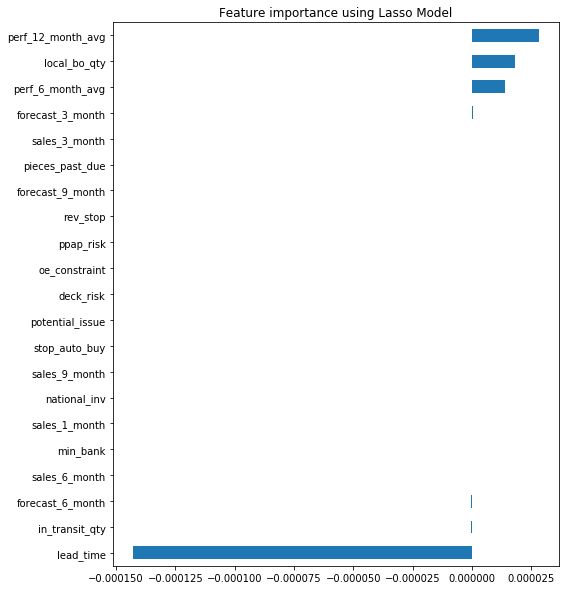

In [0]:
imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

##Aplicando o modelo de aprendizado sobre os dados com as fetures selecionadas

In [0]:
X_train.drop(columns=['min_bank', 'national_inv', 'sales_6_month', 'sales_1_month', 'lead_time', 'forecast_6_month', 'ppap_risk'])

,in_transit_qty,forecast_3_month,forecast_9_month,sales_3_month,sales_9_month,potential_issue,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,stop_auto_buy,rev_stop
sku,,,,,,,,,,,,,,
1732075,0.0,2.0,6.0,2.0,9.0,0,0.0,0.89,0.78,0.0,0,0,1,0
3007025,0.0,0.0,0.0,1.0,2.0,0,0.0,0.79,0.66,0.0,1,0,1,0
3481693,0.0,0.0,2.0,0.0,6.0,0,0.0,0.58,0.45,0.0,0,0,1,0
2966027,0.0,0.0,0.0,2.0,2.0,0,0.0,0.96,0.89,0.0,0,0,1,0
3318565,502.0,1865.0,3440.0,872.0,2433.0,0,0.0,0.87,0.83,1.0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2049225,0.0,180.0,384.0,114.0,310.0,0,0.0,1.00,0.99,0.0,0,0,1,0
3156178,200.0,700.0,2000.0,768.0,2491.0,0,0.0,0.88,0.91,0.0,0,0,1,0
1848209,103.0,140.0,440.0,174.0,425.0,0,0.0,0.24,0.31,0.0,0,0,1,0


In [0]:
# Ajuste do modelo de Regressão Logística
model = MLPClassifier(hidden_layer_sizes=(50,30,20,20), activation='relu',alpha=0.01, learning_rate='adaptive', solver='adam', random_state=42, max_iter=2000, shuffle=True, verbose=True,)
model.fit(X_train, y_train)

Iteration 1, loss = inf
Iteration 2, loss = inf
Iteration 3, loss = 0.03462826
Iteration 4, loss = inf
Iteration 5, loss = inf
Iteration 6, loss = inf
Iteration 7, loss = 0.03316784
Iteration 8, loss = inf
Iteration 9, loss = 0.03048262
Iteration 10, loss = 0.03069230
Iteration 11, loss = 0.03013998
Iteration 12, loss = 0.02991750
Iteration 13, loss = 0.03004362
Iteration 14, loss = 0.02964329
Iteration 15, loss = 0.02932475
Iteration 16, loss = 0.02939640
Iteration 17, loss = 0.02919872
Iteration 18, loss = 0.02941619
Iteration 19, loss = 0.02919495
Iteration 20, loss = 0.02980716
Iteration 21, loss = 0.03028850
Iteration 22, loss = 0.02946368
Iteration 23, loss = 0.02912351
Iteration 24, loss = 0.02925871
Iteration 25, loss = 0.02902454
Iteration 26, loss = 0.02900091
Iteration 27, loss = 0.02902584
Iteration 28, loss = 0.02891446
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


MLPClassifier(activation='relu', alpha=0.01, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(50, 30, 20, 20), learning_rate='adaptive',
              learning_rate_init=0.001, max_iter=2000, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=42, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=True, warm_start=False)

In [0]:
# Predição da probabilidade de falta (y) para novos valores
y_pred = model.predict_proba(X_test)[:,1]

from sklearn.metrics import accuracy_score


accuracy_score(y_test, y_pred.round(), normalize=False)



335332

In [0]:
from sklearn.metrics import precision_score, classification_report

model.score(X_train, y_train)


0.9927162618829549

In [0]:
# Cria e salva arquivo para submissão
test['isBackorder'] = y_pred
pred = test['isBackorder'].reset_index()
pred.to_csv('submissionML2-1.csv',index=False)